In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 22 kB/s 


In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
from google.colab import files
uploded = files.upload()

Saving new_dhaka.csv to new_dhaka.csv


In [30]:
import pandas as pd
df = pd.read_csv("new_dhaka.csv")
df = df.drop(['Unnamed: 0','Station Names'],axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               49 non-null     int64  
 1   Max Temp           49 non-null     float64
 2   Min Temp           49 non-null     float64
 3   Rainfall           49 non-null     float64
 4   Relative Humidity  49 non-null     float64
 5   Wind Speed         49 non-null     float64
 6   Cloud Coverage     49 non-null     float64
 7   Bright Sunshine    49 non-null     float64
 8   Aus_Area           49 non-null     float64
 9   Aus_Production     49 non-null     float64
 10  Amon_Area          49 non-null     float64
 11  Amon_Production    49 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 4.7 KB


In [31]:
from keras.models import Sequential
from keras.layers import Dense , LSTM ,Dropout
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               49 non-null     int64  
 1   Max Temp           49 non-null     float64
 2   Min Temp           49 non-null     float64
 3   Rainfall           49 non-null     float64
 4   Relative Humidity  49 non-null     float64
 5   Wind Speed         49 non-null     float64
 6   Cloud Coverage     49 non-null     float64
 7   Bright Sunshine    49 non-null     float64
 8   Aus_Area           49 non-null     float64
 9   Aus_Production     49 non-null     float64
 10  Amon_Area          49 non-null     float64
 11  Amon_Production    49 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 4.7 KB


In [32]:
train_date = pd.to_datetime(df['YEAR'])
train_date

0    1970-01-01 00:00:00.000001970
1    1970-01-01 00:00:00.000001971
2    1970-01-01 00:00:00.000001972
3    1970-01-01 00:00:00.000001973
4    1970-01-01 00:00:00.000001974
5    1970-01-01 00:00:00.000001975
6    1970-01-01 00:00:00.000001976
7    1970-01-01 00:00:00.000001977
8    1970-01-01 00:00:00.000001978
9    1970-01-01 00:00:00.000001979
10   1970-01-01 00:00:00.000001980
11   1970-01-01 00:00:00.000001981
12   1970-01-01 00:00:00.000001982
13   1970-01-01 00:00:00.000001983
14   1970-01-01 00:00:00.000001984
15   1970-01-01 00:00:00.000001985
16   1970-01-01 00:00:00.000001986
17   1970-01-01 00:00:00.000001987
18   1970-01-01 00:00:00.000001988
19   1970-01-01 00:00:00.000001989
20   1970-01-01 00:00:00.000001990
21   1970-01-01 00:00:00.000001991
22   1970-01-01 00:00:00.000001992
23   1970-01-01 00:00:00.000001993
24   1970-01-01 00:00:00.000001994
25   1970-01-01 00:00:00.000001995
26   1970-01-01 00:00:00.000001996
27   1970-01-01 00:00:00.000001997
28   1970-01-01 00:0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb000936510>,
      dtype=object)

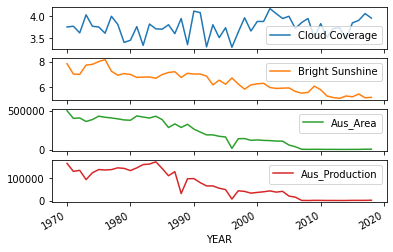

In [ ]:
df.set_index('YEAR')[['Cloud Coverage','Bright Sunshine','Aus_Area','Aus_Production']].plot(subplots = True)

In [33]:
df_new = df[['Aus_Production','Aus_Area','Max Temp','Min Temp','Rainfall','Relative Humidity','Wind Speed','Cloud Coverage']]
aus_dhaka = df_new.iloc[:,0:10]

In [34]:
aus_dhaka

,Aus_Production,Aus_Area,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage
0,167860.97650,499125.000000,33.258333,21.466667,166.250000,76.250000,1.466667,3.750000
1,131813.98050,400750.000000,32.125000,20.875000,201.333333,75.500000,1.233333,3.766667
2,136336.29770,406315.000000,33.783333,20.916667,150.666667,75.000000,1.416667,3.616667
3,94859.79953,360745.000000,33.108333,21.350000,205.333333,78.083333,1.300000,4.025000
4,125499.97290,385775.000000,31.450000,21.308333,157.916667,75.500000,1.183333,3.766667
5,140082.97180,428705.000000,32.975000,21.066667,178.750000,76.416667,1.075000,3.750000
6,137982.83850,414945.000000,33.333333,21.250000,186.500000,76.000000,1.175000,3.608333
7,139806.28040,406025.000000,32.800000,21.183333,155.083333,78.333333,1.250000,3.991667
8,147812.18800,394620.000000,33.791667,20.716667,187.583333,75.166667,1.083333,3.808333
9,145204.03110,380420.000000,33.575000,21.683333,153.083333,74.583333,1.108333,3.400000


In [16]:
aus_dhaka.describe()

,Aus_Production,Aus_Area,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,70824.807841,204976.914897,33.438112,21.762908,171.972789,74.667228,1.181139,3.753571
std,60302.977665,168270.384794,1.011136,0.528764,36.566080,2.121541,0.425173,0.222068
min,752.000000,1178.000000,30.892500,20.716667,96.583333,70.255000,0.508333,3.291667
25%,7366.342200,14490.000000,33.108333,21.350000,148.000000,73.666667,0.966667,3.616667
50%,49904.246850,169980.000000,33.625000,21.708333,170.333333,75.000000,1.108333,3.766667
75%,135596.942000,385010.000000,34.075000,22.175000,197.833333,76.000000,1.283333,3.941667
max,174832.693200,499125.000000,35.116667,23.092500,252.333333,78.333333,2.716667,4.166667


In [35]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaler = scalar.fit(aus_dhaka)
aus_dhaka_scaled = scaler.transform(aus_dhaka)
aus_dhaka_scaled

array([[ 1.62581941e+00,  1.76618324e+00, -1.79641434e-01,
        -5.66058753e-01, -1.58127263e-01,  7.53779656e-01,
         6.78514428e-01, -1.62492803e-02],
       [ 1.02186002e+00,  1.17550023e+00, -1.31210808e+00,
        -1.69661644e+00,  8.11265696e-01,  3.96599529e-01,
         1.24031257e-01,  5.95806954e-02],
       [ 1.09763043e+00,  1.20891472e+00,  3.44957086e-01,
        -1.61699969e+00, -5.88712733e-01,  1.58479445e-01,
         5.59696606e-01, -6.22889072e-01],
       [ 4.02700937e-01,  9.35294143e-01, -3.29526726e-01,
        -7.88985626e-01,  9.21790308e-01,  1.62688663e+00,
         2.82455020e-01,  1.23494529e+00],
       [ 9.16070223e-01,  1.08558432e+00, -1.98659189e+00,
        -8.68602370e-01, -3.88386872e-01,  3.96599529e-01,
         5.21343438e-03,  5.95806954e-02],
       [ 1.16040512e+00,  1.34335328e+00, -4.62758093e-01,
        -1.33037944e+00,  1.87262153e-01,  8.33153019e-01,
        -2.52225180e-01, -1.62492803e-02],
       [ 1.12521786e+00,  1.260732

In [36]:
train_x = []
train_y = []
n_features = 1
n_past =14

In [37]:
for i in range( n_past, len(aus_dhaka_scaled) - n_features +1):
  train_x.append(aus_dhaka_scaled[i - n_past:i, 0:aus_dhaka_scaled.shape[1]])
  train_y.append(aus_dhaka_scaled[i+n_features-1:i+n_features,0])

In [38]:
import numpy as np
train_x, train_y = np.array(train_x),np.array(train_y)
print(train_x.shape,train_y.shape)

(35, 14, 8) (35, 1)


In [39]:

#model
model = Sequential()
model.add(LSTM(64,activation = 'relu', input_shape =(train_x.shape[1],train_x.shape[2]), return_sequences = True))
model.add(LSTM(64,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_y.shape[1]))
model.compile(optimizer = 'adam',loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            18688     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51,777
Trainable params: 51,777
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_x,train_y,epochs= 10 ,batch_size =16, validation_split = 0.1)

Epoch 1/10
2/2 [==============================] - 3s 518ms/step - loss: 0.7729 - val_loss: 1.0862
Epoch 2/10
2/2 [==============================] - 0s 124ms/step - loss: 0.6849 - val_loss: 0.8172
Epoch 3/10
2/2 [==============================] - 0s 101ms/step - loss: 0.5834 - val_loss: 0.5772
Epoch 4/10
2/2 [==============================] - 0s 103ms/step - loss: 0.4913 - val_loss: 0.3472
Epoch 5/10
2/2 [==============================] - 0s 108ms/step - loss: 0.4134 - val_loss: 0.1238
Epoch 6/10
2/2 [==============================] - 0s 118ms/step - loss: 0.3363 - val_loss: 0.0040
Epoch 7/10
2/2 [==============================] - 0s 110ms/step - loss: 0.2456 - val_loss: 0.4066
Epoch 8/10
2/2 [==============================] - 0s 123ms/step - loss: 0.1913 - val_loss: 1.7823
Epoch 9/10
2/2 [==============================] - 0s 97ms/step - loss: 0.1833 - val_loss: 1.2644
Epoch 10/10
2/2 [==============================] - 0s 95ms/step - loss: 0.2049 - val_loss: 0.5636


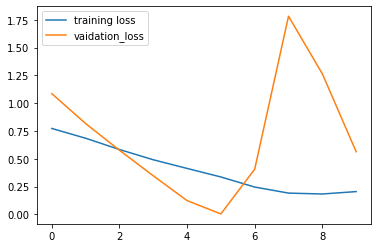

In [41]:
plt.plot(history.history['loss'],Label = 'training loss')
plt.plot(history.history['val_loss'], Label = 'vaidation_loss')
plt.legend()

In [42]:
n_future = 8
forecast_year = pd.date_range(list(train_date)[-1],periods = n_future, freq ='1y').tolist()
#forecast = model.predict (train_x[-n_future:1])
forecast_year

[Timestamp('1970-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1971-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1972-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1973-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1974-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1975-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1976-12-31 00:00:00.000002018', freq='A-DEC'),
 Timestamp('1977-12-31 00:00:00.000002018', freq='A-DEC')]

In [43]:
forecast = model.predict (train_x[-n_future:])
forecast

array([[-1.3043382],
       [-1.392212 ],
       [-1.5007786],
       [-1.6270918],
       [-1.7555804],
       [-1.8654368],
       [-1.9480387],
       [-2.0435455]], dtype=float32)

In [49]:
copies = np.repeat(forecast, aus_dhaka.shape[1],axis = 1)
future_pred = scalar.inverse_transform(copies)[:,0]
future_pred

array([ -7023.927, -12268.63 , -18748.363, -26287.3  , -33956.074,
       -40512.793, -45442.848, -51143.12 ], dtype=float32)

In [45]:
forecast_years = []
for time_i in forecast_year:
  forecast_years.append(time_i.date())

In [50]:
df_forecast = pd.DataFrame({'YEAR':np.array(forecast_years),
                            'Aus_Producton':future_pred
                            })
df_forecast['YEAR']=pd.to_datetime(df_forecast['YEAR'])
df_forecast

,YEAR,Aus_Producton
0,1970-12-31,-7023.926758
1,1971-12-31,-12268.629883
2,1972-12-31,-18748.363281
3,1973-12-31,-26287.300781
4,1974-12-31,-33956.074219
5,1975-12-31,-40512.792969
6,1976-12-31,-45442.847656
7,1977-12-31,-51143.121094


In [52]:
original = df[['YEAR','Aus_Production']]
original['YEAR']=pd.to_datetime(original['YEAR'])
original

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,YEAR,Aus_Production
0,1970-01-01 00:00:00.000001970,167860.97650
1,1970-01-01 00:00:00.000001971,131813.98050
2,1970-01-01 00:00:00.000001972,136336.29770
3,1970-01-01 00:00:00.000001973,94859.79953
4,1970-01-01 00:00:00.000001974,125499.97290
5,1970-01-01 00:00:00.000001975,140082.97180
6,1970-01-01 00:00:00.000001976,137982.83850
7,1970-01-01 00:00:00.000001977,139806.28040
8,1970-01-01 00:00:00.000001978,147812.18800
9,1970-01-01 00:00:00.000001979,145204.03110


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


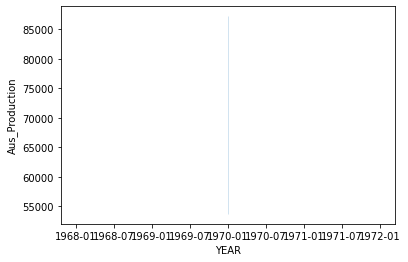

In [56]:
import seaborn as sns
sns.lineplot(original['YEAR'],original['Aus_Production'])
#sns.lineplot(df_forecast['YEAR'],df_forecast['Aus_Production'])